Project 3: (10 points)
your total (50 points) will divided by 5 to get 10 points for this project.


In this project, we will focus on the preprocessing step before building the model.

We will prepare data before making a Market basket analysis, which is an algorithm originally designed to help retailers understand and improve their businesses.

Also, we will do some important preprocessing step before building an unsupervised model for Customer Segments.

### Market Basket Analysis
---
Imagine you work for a retailer that sells dozens of products and your boss comes to you and asks the following questions:

* What products are purchased together most frequently?
* How should the products be organized and positioned in the store?
* How do we identify the best products to discount via coupons?
---
##### You might reasonably respond with complete bewilderment, as those questions are very diverse and do not immediately seem answerable using a single algorithm and dataset. However, the answer to all those questions and many more is market basket analysis.
--
### Dataset:
you can find the dataset on Canvas under Dataset section: "Online Retail.xlsx"

### Steps to do:

1- Open a Jupyter notebook.

2- Install the following libraries, if not installed, and then import them:
* matplotlib.pyplot, which is used to plot the results of the models.
* mlxtend.frequent_patterns, which is used to run the models;
* mlxtend.preprocessing, which is used to encode and prep the data for the models;
* numpy, which is used to work with arrays;
* pandas, which is used to work with DataFrames.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
!pip install mlxtend

In [ ]:
import matplotlib.pyplot as plt
import mlxtend.frequent_patterns
import mlxtend.preprocessing
import numpy
import pandas

3- Loading Data ( 1 point)

Load and view online retail dataset.Once you have downloaded the dataset, save it and note the path.

In [ ]:
# write your code here
import pandas as pd

# Load the dataset into a Pandas DataFrame
online_retail_data = pd.read_excel('Online Retail.xlsx')

# Display the first few rows of the dataset
online_retail_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


4- Print out the first 10 rows of the DataFrame. ( 1 point)

Notice that the data contains some columns that will not be relevant to market basket analysis:

In [ ]:
# write your code here
online_retail_data.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


5- Print out the data type for each column in the DataFrame. (1 point)

This information will come in handy when trying to perform specific cleaning tasks. Columns need to be of the correct type in order for filtering and computing to execute as expected:

In [ ]:
# write your code here
online_retail_data.dtypes

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

6- Get and print the dimensions of the DataFrame, as well as the number of unique invoice numbers and customer identifications (2 points)

In [ ]:
# write your code here
# Get and print the dimensions of the DataFrame
data_dimensions = online_retail_data.shape
print("Dimensions of the DataFrame:", data_dimensions)

# Get and print the number of unique invoice numbers and customer identifications
unique_invoices = online_retail_data['InvoiceNo'].nunique()
unique_customers = online_retail_data['CustomerID'].nunique()

print("Number of unique invoice numbers:", unique_invoices)
print("Number of unique customer identifications:", unique_customers)



Dimensions of the DataFrame: (541909, 8)
Number of unique invoice numbers: 25900
Number of unique customer identifications: 4372


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7- Data Cleaning and Formatting:

a. Create an indicator column stipulating whether the invoice number begins with "C". Called the column "IsCPresent" ( 1 points)

In [ ]:
# write your code here

# Creating the "IsCPresent" column

online_retail_data['IsCPresent'] = online_retail_data['InvoiceNo'].str.startswith('C')

# Display the updated DataFrame with the new column

online_retail_data.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsCPresent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaN


b. (3 points)
- Filter out all transactions having either zero or a negative number of items (in other words, items were returned),
- Remove all invoice numbers starting with "C" using the column created in previous step
- Subset the DataFrame down to InvoiceNo and Description
- Drop all rows with at least one missing value.
- Rename the DataFrame online1 and print out the first 10 rows of the filtered DataFrame, online1.

In [ ]:
# write your code here

# Filter out transactions with zero or negative quantity
online_retail_data = online_retail_data[online_retail_data['Quantity'] > 0]

# Remove invoice numbers starting with "C" using the 'IsCPresent' column
online_retail_data = online_retail_data[~(online_retail_data['IsCPresent'].fillna(False))]

# Subset the DataFrame to InvoiceNo and Description
online1 = online_retail_data[['InvoiceNo', 'Description']]

# Drop rows with missing values
online1 = online1.dropna()

# Display the first 10 rows of the filtered DataFrame
online1.head(10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,InvoiceNo,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
5,536365,SET 7 BABUSHKA NESTING BOXES
6,536365,GLASS STAR FROSTED T-LIGHT HOLDER
7,536366,HAND WARMER UNION JACK
8,536366,HAND WARMER RED POLKA DOT
9,536367,ASSORTED COLOUR BIRD ORNAMENT


c. Approximately, how many rows and invoice numbers have already removed? ( 2 points)

--
### Edit to write your answer here

In [ ]:
#write your code here to prove your answer:

# Original number of rows and unique invoice numbers
original_rows = online_retail_data.shape[0]
original_invoice_numbers = online_retail_data['InvoiceNo'].nunique()

# Filtered number of rows and unique invoice numbers
filtered_rows = online1.shape[0]
filtered_invoice_numbers = online1['InvoiceNo'].nunique()

# Print the results
print("Original Number of Rows:", original_rows)
print("Original Number of Unique Invoice Numbers:", original_invoice_numbers)
print("\nFiltered Number of Rows:", filtered_rows)
print("Filtered Number of Unique Invoice Numbers:", filtered_invoice_numbers)

# Approximate number of rows and invoice numbers removed
rows_removed = original_rows - filtered_rows
invoice_numbers_removed = original_invoice_numbers - filtered_invoice_numbers

print("\nApproximately,")
print("Rows Removed:", rows_removed)
print("Invoice Numbers Removed:", invoice_numbers_removed)




Original Number of Rows: 531285
Original Number of Unique Invoice Numbers: 20728

Filtered Number of Rows: 530693
Filtered Number of Unique Invoice Numbers: 20136

Approximately,
Rows Removed: 592
Invoice Numbers Removed: 592


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


d. (2 points)
- Extract the invoice numbers from the DataFrame as a list.
- Remove duplicate elements to create a list of unique invoice numbers.
- Confirm that the process was successful by printing the length of the list of unique invoice numbers.

In [ ]:
# write your code here

# Extract invoice numbers from the DataFrame as a list
invoice_numbers_list = online1['InvoiceNo'].tolist()

# Remove duplicate elements to create a list of unique invoice numbers
unique_invoice_numbers = list(set(invoice_numbers_list))

# Confirm the success by printing the length of the list of unique invoice numbers
print("Length of Unique Invoice Numbers List:", len(unique_invoice_numbers))




Length of Unique Invoice Numbers List: 20136


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


e. Take the list from step d and cut it to only include the first 5,000 elements. Print out the length of the new list to confirm that it is, in fact, the expected length of 5,000( 1 point)

In [ ]:
# write your code here
# Take the list of unique invoice numbers and cut it to include only the first 5,000 elements
limited_invoice_numbers = unique_invoice_numbers[:5000]

# Print out the length of the new list to confirm it is the expected length of 5,000
print("Length of Limited Invoice Numbers List:", len(limited_invoice_numbers))

Length of Limited Invoice Numbers List: 5000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


f. Filter the online1 DataFrame down by only keeping the invoice numbers in the list from step e and print out the first 10 rows of online1( 1 point)

In [ ]:
# write your code here
# Filter the online1 DataFrame to only include the invoice numbers in the list from step e
online1_filtered = online1[online1['InvoiceNo'].isin(limited_invoice_numbers)]

# Print out the first 10 rows of the filtered DataFrame
print(online1_filtered.head(10))

  InvoiceNo                          Description
0    536365   WHITE HANGING HEART T-LIGHT HOLDER
1    536365                  WHITE METAL LANTERN
2    536365       CREAM CUPID HEARTS COAT HANGER
3    536365  KNITTED UNION FLAG HOT WATER BOTTLE
4    536365       RED WOOLLY HOTTIE WHITE HEART.
5    536365         SET 7 BABUSHKA NESTING BOXES
6    536365    GLASS STAR FROSTED T-LIGHT HOLDER
7    536366               HAND WARMER UNION JACK
8    536366            HAND WARMER RED POLKA DOT
9    536367        ASSORTED COLOUR BIRD ORNAMENT


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


g. Print out the dimensions of the DataFrame (online1) and the number of unique invoice numbers to confirm that the filtering and cleaning process was successful (1 point)

In [ ]:
# write your code here
# Print out the dimensions of the DataFrame (online1)
print("Dimensions of the DataFrame (online1):", online1_filtered.shape)

# Print out the number of unique invoice numbers in the filtered DataFrame
unique_invoice_numbers_filtered = online1_filtered['InvoiceNo'].nunique()
print("Number of Unique Invoice Numbers in the filtered DataFrame:", unique_invoice_numbers_filtered)


Dimensions of the DataFrame (online1): (133315, 2)
Number of Unique Invoice Numbers in the filtered DataFrame: 5000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


h. Transform the data in online1 into the aforementioned list of lists called invoice_item_list. The process for doing this is to iterate over the unique invoice numbers and, at each iteration, extract the item descriptions as a list and append that list to the larger invoice_item_list list. Print out elements one through four of the list (2 points)

In [ ]:
# write your code here
# Initialize an empty list to store the lists of item descriptions
invoice_item_list = []

# Iterate over unique invoice numbers
for invoice_number in limited_invoice_numbers:

    # Extract item descriptions for the current invoice number
    items_for_invoice = online1_filtered.loc[online1_filtered['InvoiceNo'] == invoice_number, 'Description'].tolist()

    # Append the list of item descriptions to the larger invoice_item_list
    invoice_item_list.append(items_for_invoice)

# Print elements one through four of the list

print("Elements 1-4 of invoice_item_list:")
for i in range(4):
    print(invoice_item_list[i])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Elements 1-4 of invoice_item_list:
['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER']
['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT']
['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND']
['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION']


8- Data Encoding

While cleaning the data is crucial, the most important part of the data preparation process is molding the data into the correct form. Before running the models, the data, currently in the list of lists form, needs to be encoded and recast as a DataFrame.

To do this, we will leverage TransactionEncoder from the preprocessing module of mlxtend. The output from the encoder is a multidimensional array, where each row is the length of the total number of unique items in the transaction dataset and the elements are Boolean variables, indicating whether that particular item is linked to the invoice number that row represents. With the data encoded, we can recast it as a DataFrame where the rows are the invoice numbers and the columns are the unique items in the transaction dataset.

The data encoding will be done using mlxtend, but if you wish to encode the data without using a package, you are free.

More info about mlxtend in the link: https://rasbt.github.io/mlxtend/

a. Initialize and fit the transaction encoder. Print out an example of the resulting data. (2 points)

In [ ]:
# write your code here

from mlxtend.preprocessing import TransactionEncoder

# Initialize TransactionEncoder
te = TransactionEncoder()

# Fit the encoder on the list of lists (invoice_item_list)
te.fit(invoice_item_list)

# Transform the data using the fitted encoder
encoded_data = te.transform(invoice_item_list)

# Print an example of the resulting encoded data
print("Example of the resulting encoded data:")
print(encoded_data[:3])  # Print the first 3 rows as an example



Example of the resulting encoded data:
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


b. Recast the encoded array as a DataFrame named online_encoder_df. Print the predefined subset of the DataFrame that features both True and False values (2 points)

In [ ]:
# write your code here
import pandas as pd

# Recast the encoded array as a DataFrame
online_encoder_df = pd.DataFrame(encoded_data, columns=te.columns_)

# Print the predefined subset of the DataFrame that features both True and False values
print("Subset of online_encoder_df with True and False values:")


# Print the first 10 rows as an example
online_encoder_df.head(10)

Subset of online_encoder_df with True and False values:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,4 PURPLE FLOCK DINNER CANDLES,OVAL WALL MIRROR DIAMANTE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,...,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC METAL HEART DECORATION,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,amazon,amazon sales,found,rcvd be air temp fix for dotcom sit,wrongly sold (22719) barcode
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


c. Print out the dimensions of the encoded DataFrame. It should have 5,000 rows because the data used to generate it was previously filtered down to 5,000 unique invoice numbers. (1 point)

In [ ]:
# write your code here
print("Dimensions of the encoded DataFrame (online_encoder_df):", online_encoder_df.shape)

Dimensions of the encoded DataFrame (online_encoder_df): (5000, 3135)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### The data is now prepared for modeling.
---

### Wholesale Data

we will analyze a dataset containing data on various customers' annual spending amounts (reported in monetary units) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

--
### Dataset:
you can find the dataset on Canvas under Dataset section: "wholesale_customers_data.csv"

In [ ]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from numpy.random import uniform, multivariate_normal, rand, randn, seed
from itertools import repeat
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import gridspec
from matplotlib.colors import to_rgba
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import jarque_bera, normaltest
import matplotlib.pyplot as plt
import scipy.stats as stats


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1. Load the wholesale customers dataset (1 point)

In [ ]:
# write your code here
wholesale_data = pd.read_csv('wholesale_customers_data.csv')

wholesale_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


2. Drop Channel & Region and print the current columns ( 1 point)

In [ ]:
# write your code here
# Drop 'Channel' and 'Region' columns
wholesale_data = wholesale_data.drop(['Channel', 'Region'], axis=1)

# Print the current columns
print("Current Columns:")

wholesale_data.columns

Current Columns:


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

### Data Exploration:

You will begin exploring the data through visualizations and code to understand how each feature is related to the others.



3. Show a statistical summary for each of the above product categories. (1 point)

In [ ]:
# write your code here
wholesale_data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


4. Show a visual representation of the distribution of each feature in the data.using histogram and normal probability plot. (2 points)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


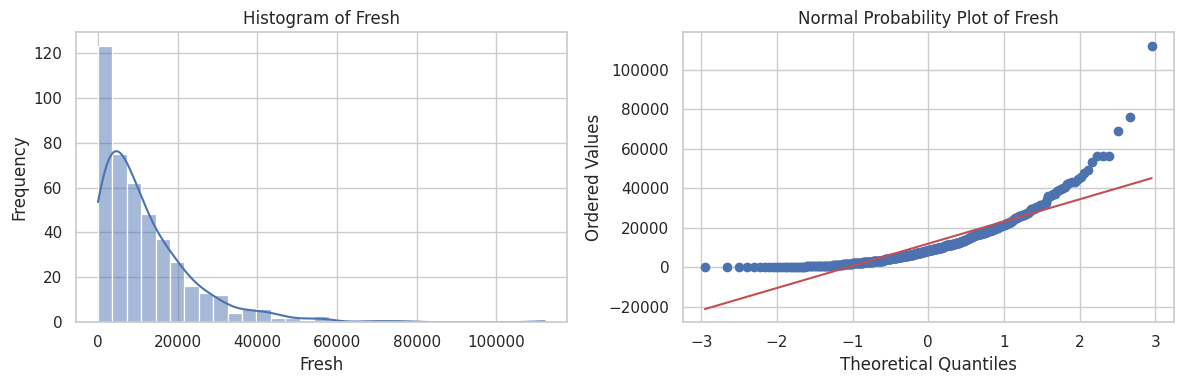

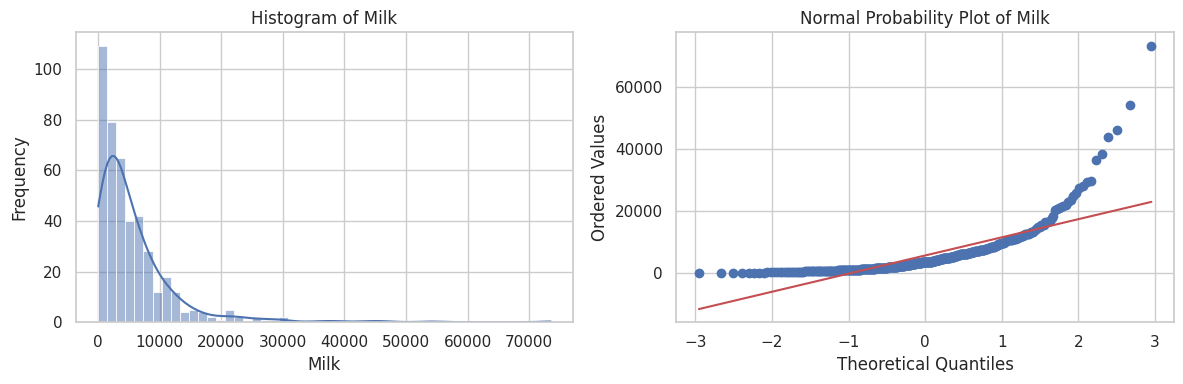

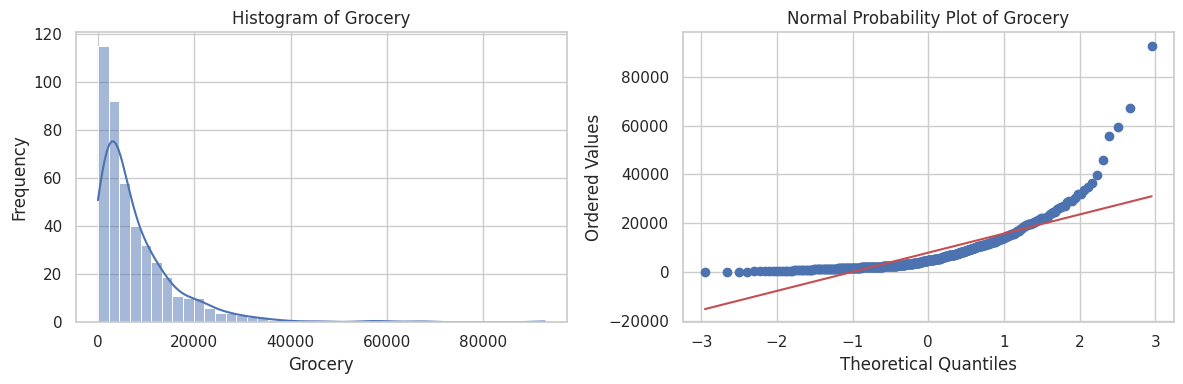

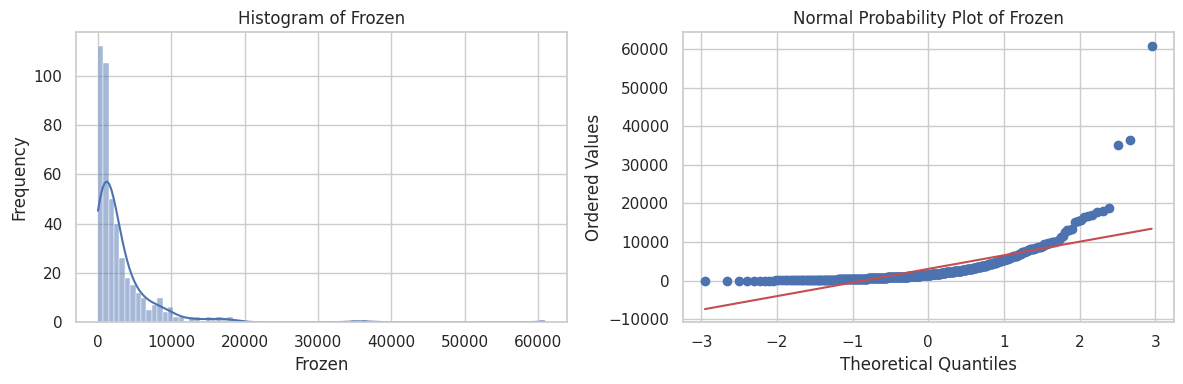

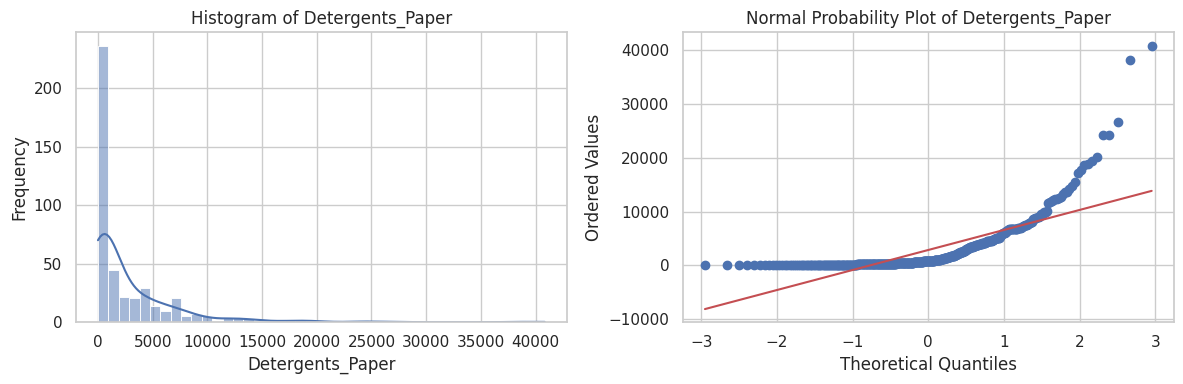

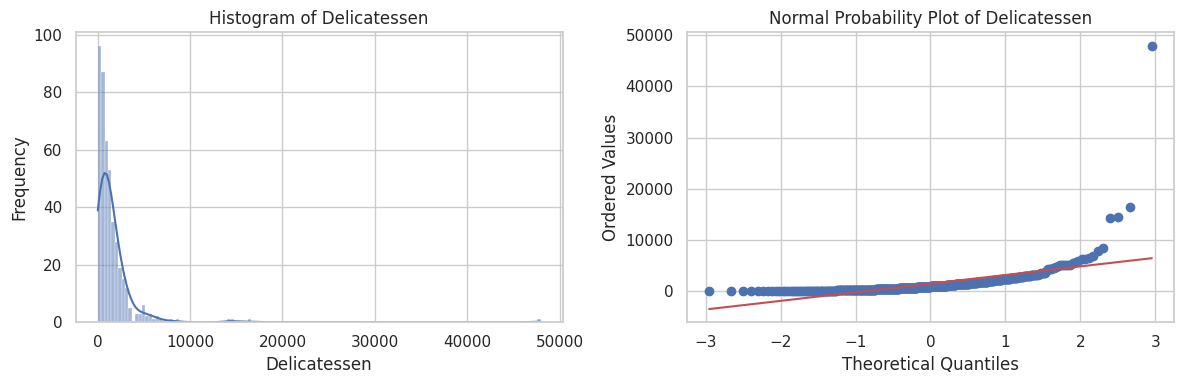

In [ ]:
# write your code here

# Loop through columns and create plots

# Set the style for seaborn
sns.set(style="whitegrid")

# Loop through each column and create histogram and normal probability plot
for column in wholesale_data.columns:
    # Create subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Plot Histogram
    sns.histplot(wholesale_data[column], kde=True, ax=axes[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # Plot Normal Probability Plot
    stats.probplot(wholesale_data[column], dist="norm", plot=axes[1])
    axes[1].set_title(f'Normal Probability Plot of {column}')
    axes[1].set_xlabel('Theoretical Quantiles')
    axes[1].set_ylabel('Ordered Values')

    # Adjust layout
    plt.tight_layout()

    # Show the plots
    plt.show()


5. What do you observe about distribution? (2 points)

The histogram and normal distribution plot indicate that the data distribution closely resembles a normal distribution. This suggests that most data points are concentrated near the mean, and outliers are minimal. Nevertheless, there are slight deviations from perfect normality, noticeable in a slight leftward skew.

The normal distribution plot demonstrates a generally good alignment of data points with theoretical quantiles, indicating a close resemblance to normal distribution. However, discrepancies between actual and theoretical quantiles suggest that the data distribution is not perfectly normal.

6. Scale the sample data using the natural logarithm ( 1 point)

In [ ]:
# Scale the data using the natural logarithm
# Apply natural logarithm to the entire DataFrame
wholesale_data_log = np.log1p(wholesale_data)

# Print the scaled data
print("Scaled Data using Natural Logarithm:")
print(wholesale_data_log.head())


Scaled Data using Natural Logarithm:
       Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0   9.446992  9.175438  8.930891  5.370638          7.891705      7.199678
1   8.861917  9.191259  9.166284  7.474772          8.099858      7.482682
2   8.756840  9.083529  8.947026  7.785721          8.165364      8.967632
3   9.492960  7.087574  8.348064  8.764834          6.230481      7.489412
4  10.026413  8.596189  8.881697  8.272826          7.483244      8.553718


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7. Check for Outliers using boxplot ( 2 points)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


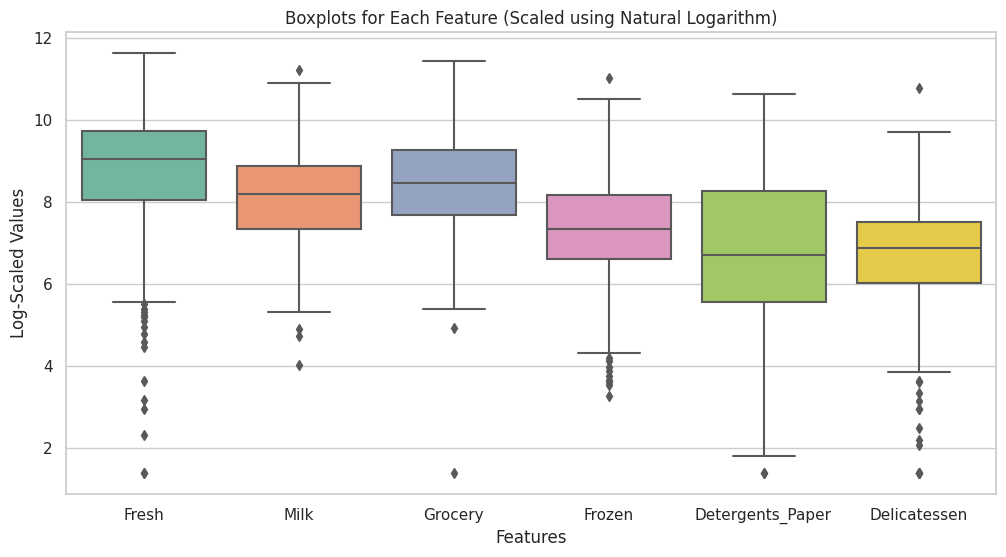

In [ ]:
# write your code here
# Set the style for seaborn
sns.set(style="whitegrid")

# Create boxplots for each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=wholesale_data_log, palette="Set2")
plt.title("Boxplots for Each Feature (Scaled using Natural Logarithm)")
plt.xlabel("Features")
plt.ylabel("Log-Scaled Values")
plt.show()


8. Apply natural log to transform long tails and plot the Log Sales Distribution using violinplot (2 points)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


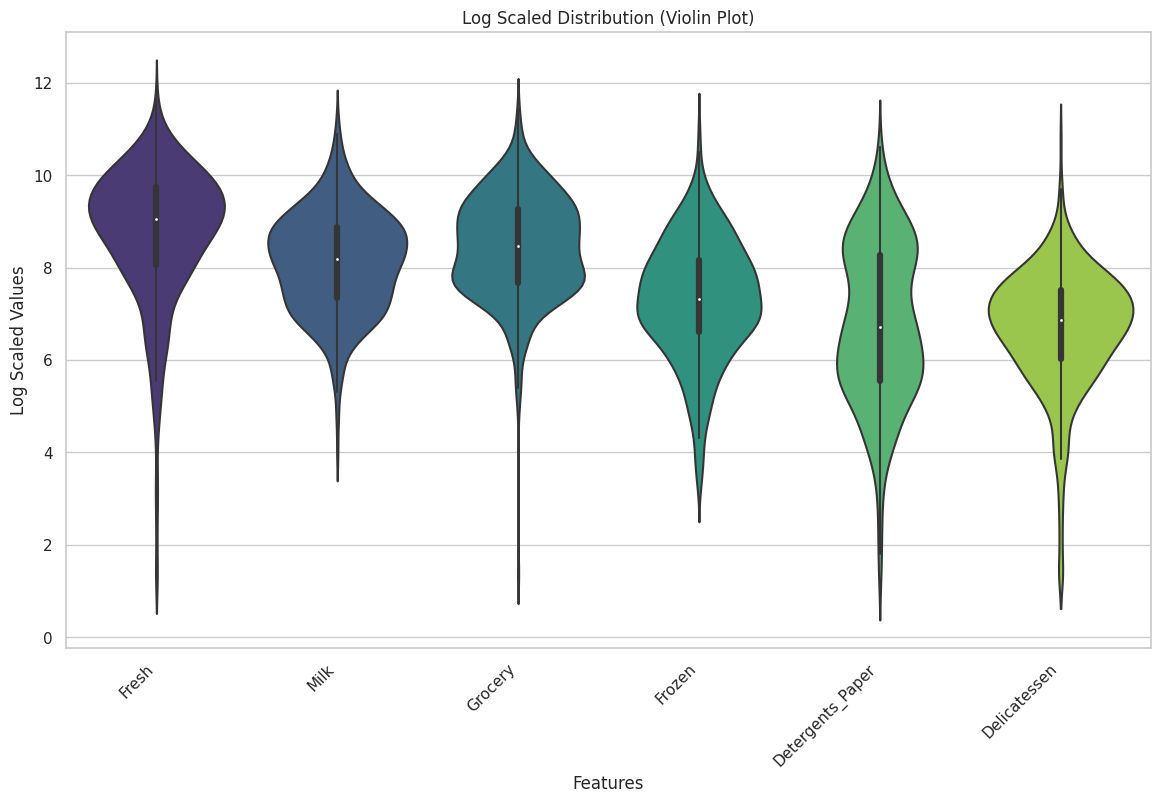

In [ ]:
# write your code here
wholesale_data_log = np.log1p(wholesale_data)

# Melt the DataFrame for better visualization in a violin plot
wholesale_data_log_melted = wholesale_data_log.melt(var_name="Features", value_name="Log_Scaled_Values")

# Create a violin plot for the log-scaled distribution
plt.figure(figsize=(14, 8))
sns.violinplot(x="Features", y="Log_Scaled_Values", data=wholesale_data_log_melted, palette="viridis")
plt.title("Log Scaled Distribution (Violin Plot)")
plt.xlabel("Features")
plt.ylabel("Log Scaled Values")
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# write your code here


9. Remove Outliers using LocalOutlierFactor and plot the Log Sales Distribution using violinplot after removing the outliers. (2 points)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


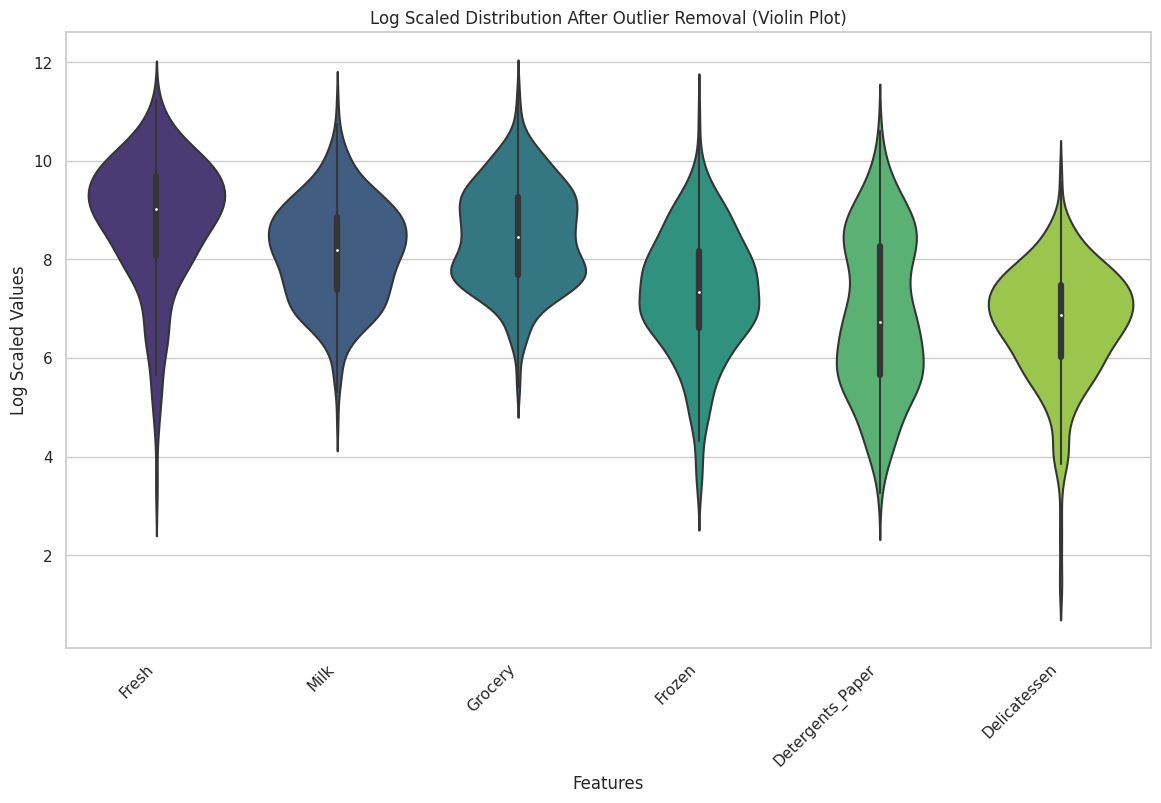

In [ ]:
# write your code here
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# Apply natural logarithm to the entire DataFrame
wholesale_data_log = np.log1p(wholesale_data)

# Use Local Outlier Factor to detect and remove outliers
lof = LocalOutlierFactor(contamination=0.05)  # Adjust contamination as needed
outliers = lof.fit_predict(wholesale_data_log)

# Filter out rows that are not outliers
wholesale_data_no_outliers = wholesale_data_log[outliers != -1]

# Melt the DataFrame for better visualization in a violin plot
wholesale_data_no_outliers_melted = wholesale_data_no_outliers.melt(var_name="Features", value_name="Log_Scaled_Values")

# Create a violin plot for the log-scaled distribution after removing outliers
plt.figure(figsize=(14, 8))
sns.violinplot(x="Features", y="Log_Scaled_Values", data=wholesale_data_no_outliers_melted, palette="viridis")
plt.title("Log Scaled Distribution After Outlier Removal (Violin Plot)")
plt.xlabel("Features")
plt.ylabel("Log Scaled Values")
plt.xticks(rotation=45, ha='right')
plt.show()



10. use sns.pairplot to visualize Feature Distributions in your cleaned data (2 points)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


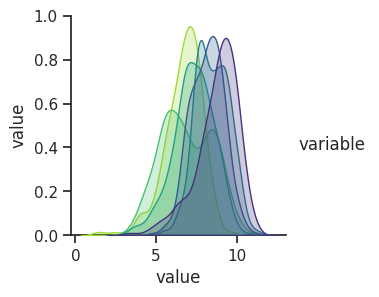

In [ ]:
# write your code here
# Melt the DataFrame for pairplot
wholesale_data_melted = wholesale_data_no_outliers.melt()

# Create a pairplot
sns.set(style="ticks")
pair_plot = sns.pairplot(wholesale_data_melted, hue="variable", diag_kind="kde", palette="viridis", height=3)

# Show the plot
plt.show()

11. Check for Correlations using sns.clustermap (2 points)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1200x1000 with 0 Axes>

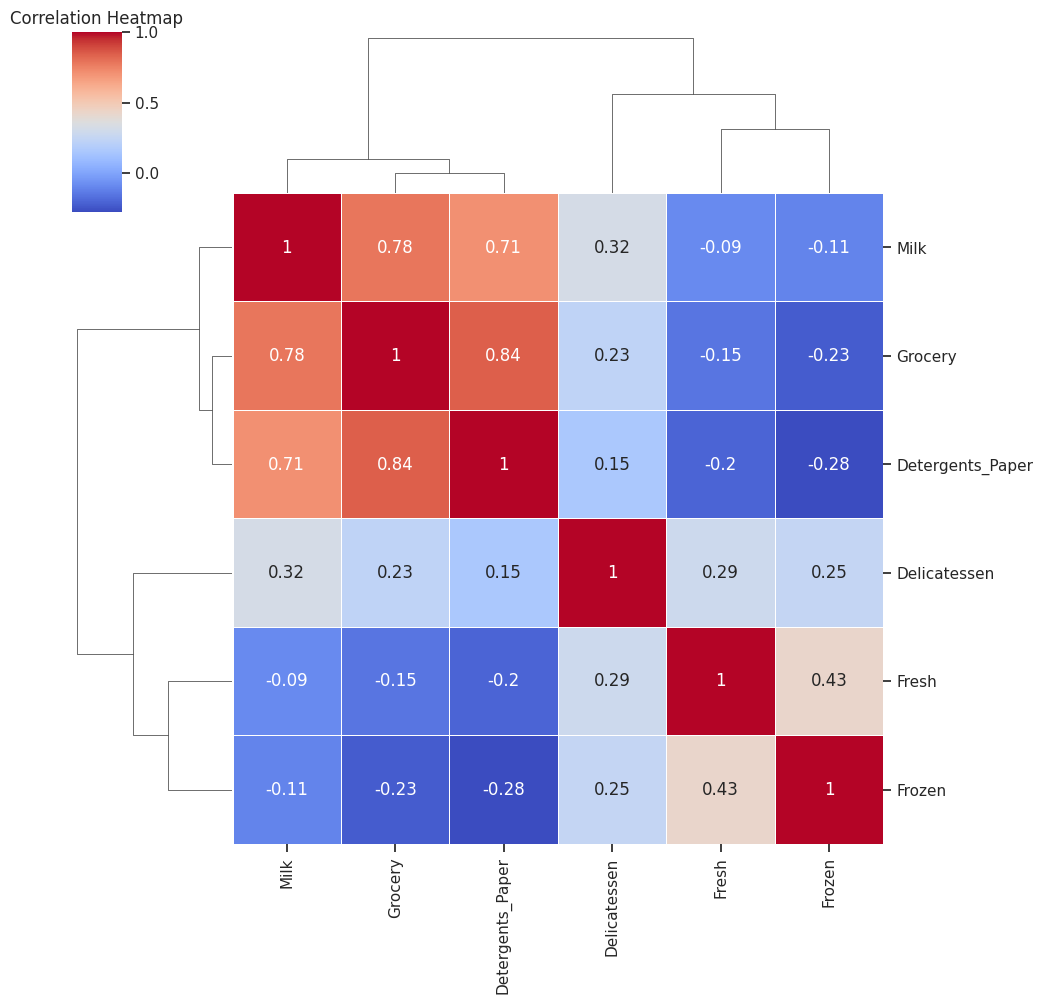

In [ ]:
# write your code here

# Calculate the correlation matrix
correlation_matrix = wholesale_data_no_outliers.corr()

# Create a clustered heatmap
plt.figure(figsize=(12, 10))
sns.clustermap(correlation_matrix, cmap="coolwarm", annot=True, linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()


12. What do you observe? (2 points)

Insights from the Heatmap:

Significant correlations are observed between certain items, such as:

Milk and Groceries.
Detergent Papers and Grocery.
This finding suggests a potential strategy for the retail industry and supermarkets to optimize stocking practices by placing these items together. Customers are more inclined to purchase them in tandem.

Conversely, there is a notably weak correlation between:

Frozen items and Detergent Papers.
Grocery and Frozen items.
This implies that grouping these items together might not significantly impact overall sales and should be carefully considered in stocking decisions.

### PCA
Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the cleaned data to discover which dimensions about the data best maximize the variance of features involved.

13. Biplot: Visualizing Product Relationships in 2D (2 points)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


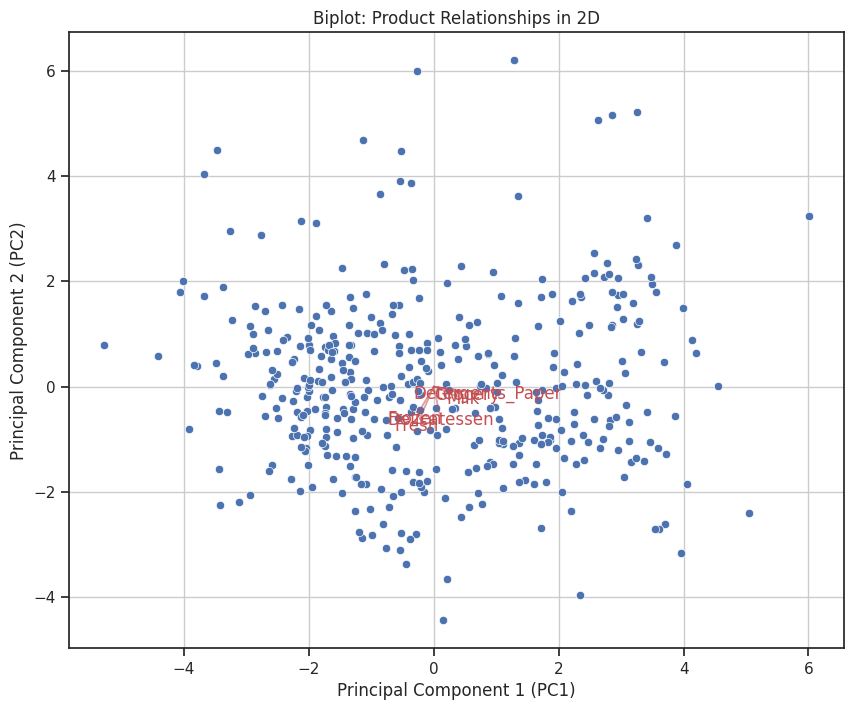

In [ ]:
# write your code here
# Apply PCA to the cleaned data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(wholesale_data_no_outliers)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot the biplot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)

# Add variable loadings to the biplot
for i, feature in enumerate(wholesale_data_no_outliers.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*1.2, pca.components_[1, i]*1.2, feature, color='r', ha='center', va='center')

plt.title('Biplot: Product Relationships in 2D')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid(True)
plt.show()



14. Use sns.jointplot to plot x and y in the above code (2 points)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


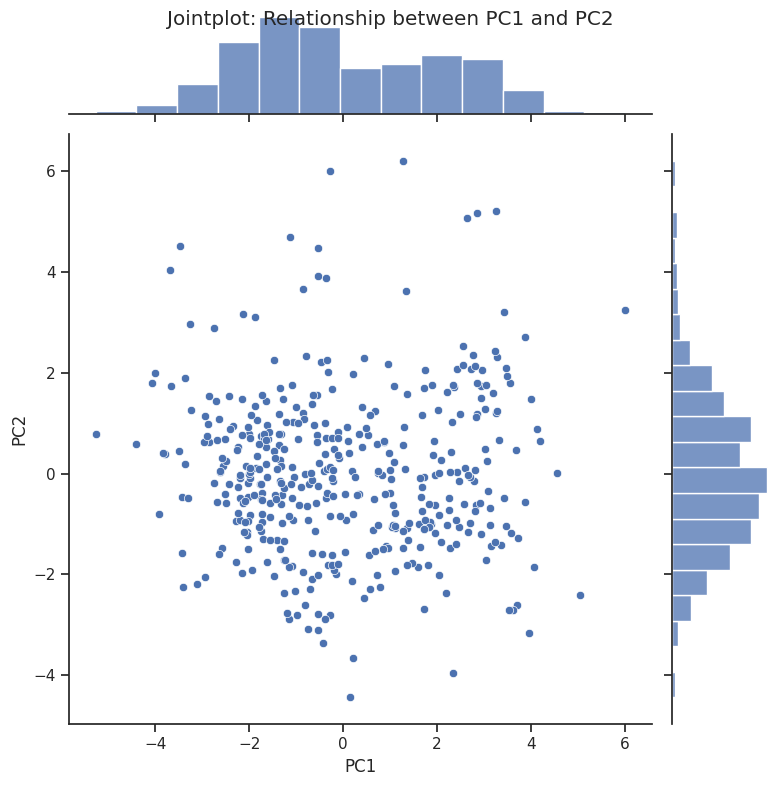

In [ ]:
# write your code here
# Apply PCA to the cleaned data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(wholesale_data_no_outliers)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Use sns.jointplot to visualize the relationship
sns.jointplot(x='PC1', y='PC2', data=pca_df, kind='scatter', height=8)
plt.suptitle('Jointplot: Relationship between PC1 and PC2')
plt.show()


15. Exploring the new Descriptors of the cleand Data using plot.bar (2 points)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


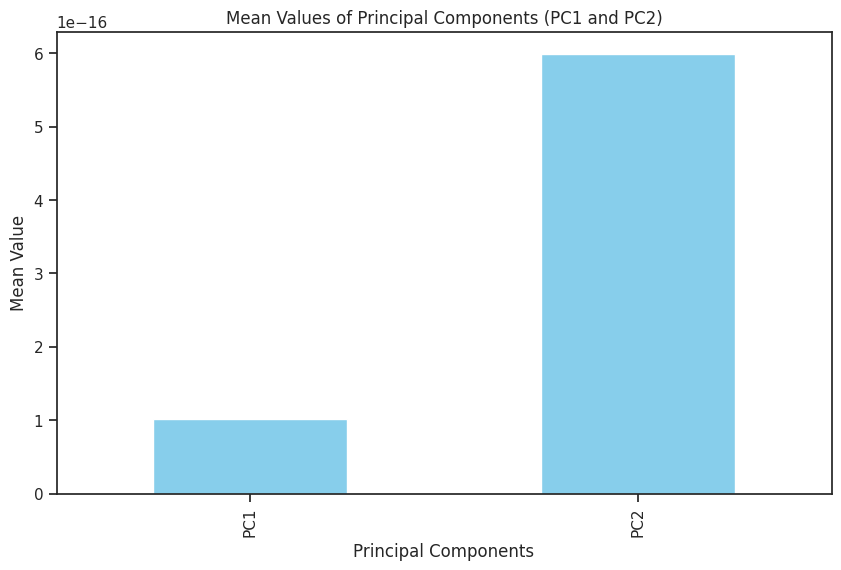

In [ ]:
# write your code here
# Apply PCA to the cleaned data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(wholesale_data_no_outliers)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot bar plot for the first two principal components
plt.figure(figsize=(10, 6))
pca_df.mean().plot.bar(color='skyblue')
plt.title('Mean Values of Principal Components (PC1 and PC2)')
plt.xlabel('Principal Components')
plt.ylabel('Mean Value')
plt.show()

16. How much approximately the first and second features of explain of variance in total? (1 point)



In [ ]:
# Apply PCA to the cleaned data
pca = PCA(n_components=2)
pca_result = pca.fit_transform(wholesale_data_no_outliers)

# Explained variance ratios for each principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance for the first and second features
print(f"Explained Variance for PC1: {explained_variance_ratio[0]:.2%}")
print(f"Explained Variance for PC2: {explained_variance_ratio[1]:.2%}")

Explained Variance for PC1: 46.55%
Explained Variance for PC2: 27.39%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


---
## All set

Please make sure you execute each cell before you submit your file; this is important because if your code didn't work on our machine for an unknown reason, it would be better to see the result rather than losing some points or wasting time to contact you to fix this issue.

What to submit:

* Your Jupyter Notebook file.
* Name your file as firstname_lastname_pj_3 .
---